# Imports and constants

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from Metrics import compute_metrics, make_metric_plots
import visualizer.Viewer as vw
from models.time_series.anomaly.machine_learning.TimeSeriesAnomalyDBSCAN import TimeSeriesAnomalyDBSCAN
from reader.NABTimeSeriesReader import NABTimeSeriesReader

# DATASET 1: ambient_temperature_system_failure
# DATASET 2: nyc_taxi
DATASET_PATH = "data/dataset/"
DATASET = "nyc_taxi.csv"
PURE_DATA_KEY = "realKnownCause/nyc_taxi.csv"
GROUND_WINDOWS_PATH = "data/dataset/combined_windows.json"

def preprocess(X) -> np.ndarray:
    return StandardScaler().fit_transform(X)

# Read the dataset

In [3]:
reader = NABTimeSeriesReader(DATASET_PATH)
all_df = reader.read(DATASET_PATH + DATASET).get_dataframe()

data_test = preprocess(np.array(all_df["value"]).reshape(all_df["value"].shape[0], 1))
data_test_labels = all_df["target"]
dataframe = all_df.copy()
dataframe["value"] = data_test

# Create model, classify and score

In [4]:
model = TimeSeriesAnomalyDBSCAN(window=3,
                                eps=2.75,
                                min_samples=31,
                                #anomaly_threshold=0.9888,
                                anomaly_portion=0.0003,
                                classification="points_score")

true_labels = data_test_labels

labels = model.classify(data_test.reshape((-1, 1)))
scores = model.anomaly_score(data_test.reshape((-1, 1)))

# Evaluation metrics for anomaly detection

In [5]:
compute_metrics(true_labels, scores, labels, only_roc_auc=False)

ACCURACY SCORE:  0.9994186046511628
PRECISION SCORE:  0.0
RECALL SCORE:  0.0
F1 SCORE:  0.0
AVERAGE PRECISION SCORE:  0.025589562774586273
PRECISION-RECALL AUC SCORE:  0.016066704289650655
AUROC SCORE:  0.6618128938439166


# Confusion matrix

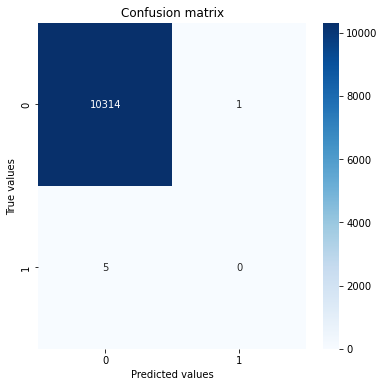

In [6]:
confusion_matrix = metrics.confusion_matrix(true_labels, labels)
vw.plot_confusion_matrix(confusion_matrix)

# ROC curve

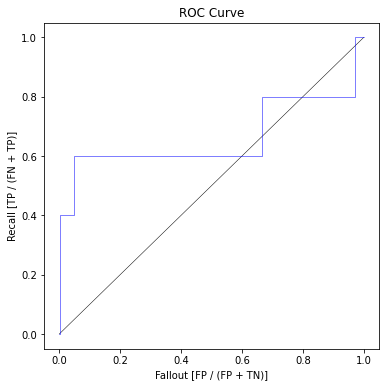

In [7]:
vw.plot_roc_curve(true_labels, scores)

# Precision-recall curve

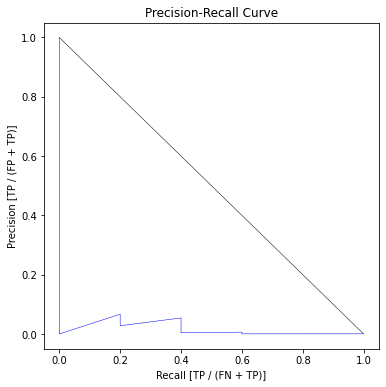

In [8]:
vw.plot_precision_recall_curve(true_labels, scores)

# Assigned labels

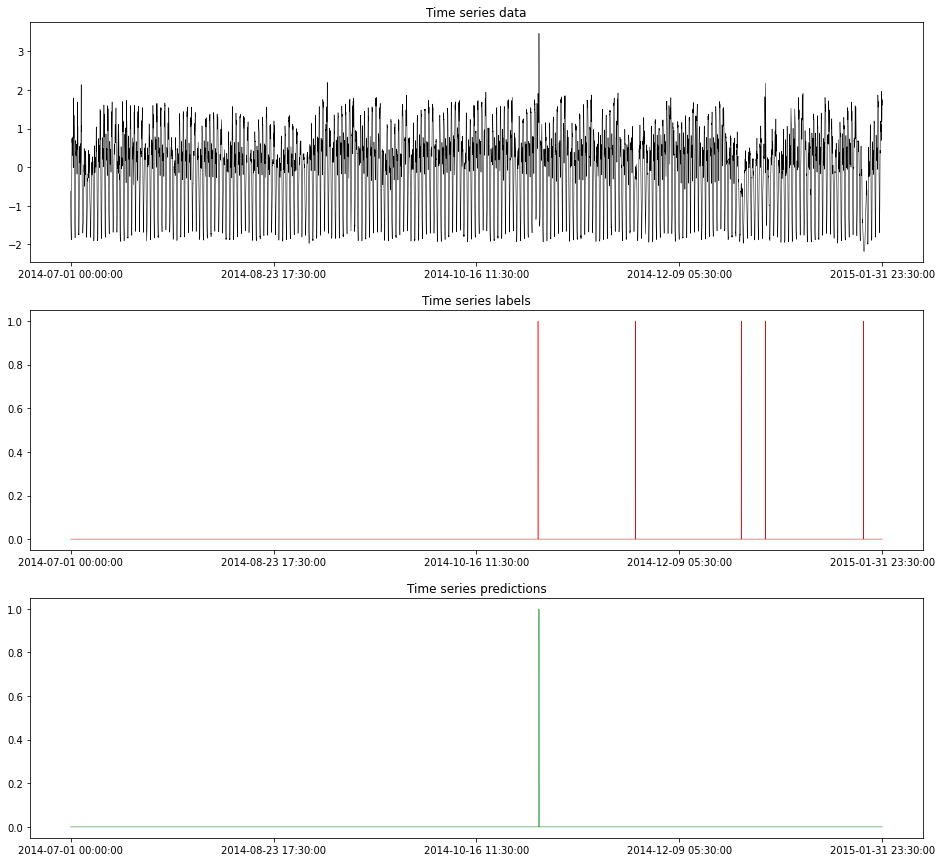

In [9]:
vw.plot_univariate_time_series_predictions(dataframe, labels)

# Assigned scores

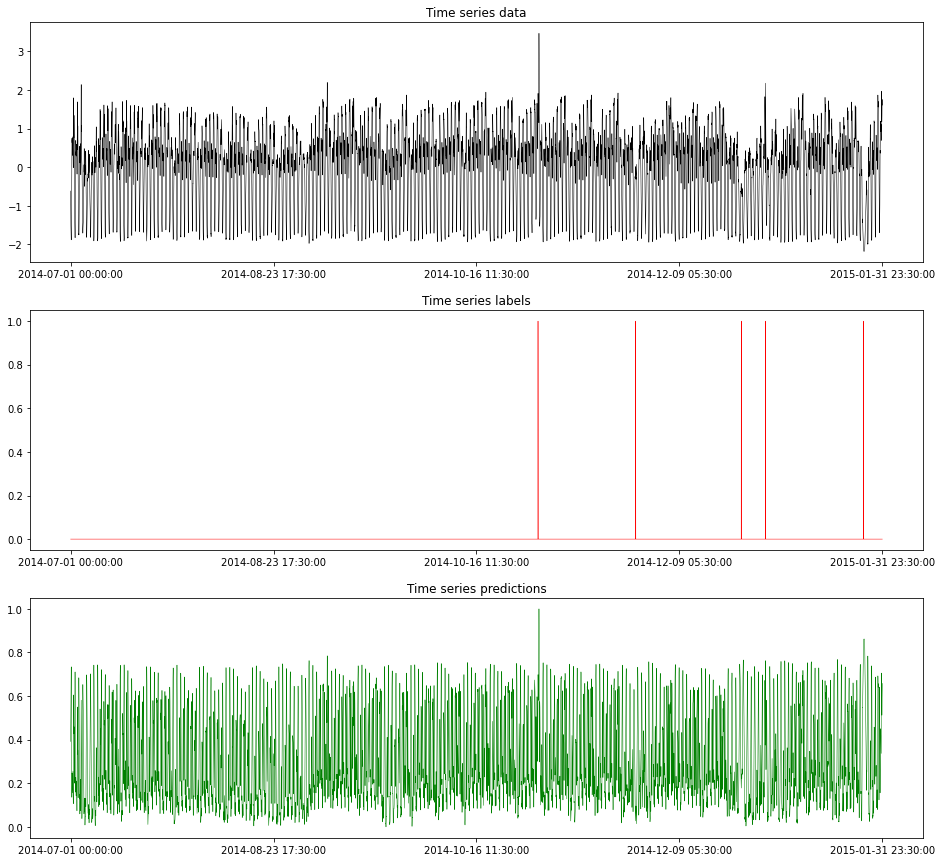

In [10]:
vw.plot_univariate_time_series_predictions(dataframe, scores)

# Anomalies predictions as red dots

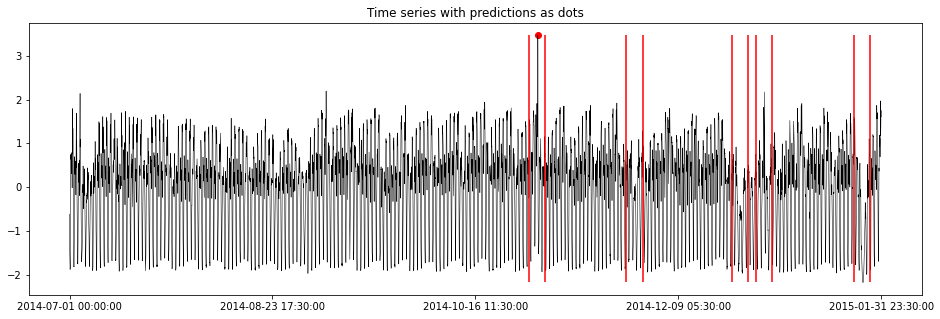

In [11]:
bars = vw.get_bars_indices_on_test_df(all_df,
                                      dataframe,
                                      PURE_DATA_KEY,
                                      GROUND_WINDOWS_PATH)
vw.plot_time_series_with_predicitons_bars(dataframe,
                                          labels,
                                          bars,
                                          pred_color='r')